In [1]:
'''
This module conducts LDA on lists of words.
'''

'\nThis module conducts LDA on lists of words.\n'

In [3]:
from collections import defaultdict
import os
import pandas as pd

import json

# Regular Expression library
import re

from wordcloud import WordCloud

import matplotlib.pyplot as mplt

In [53]:
# Importing important packages

import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords


import gensim.corpora as corpora

from pprint import pprint


import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

import time

import seaborn as sns
import numpy as np

In [67]:
clean_parties = ['BE', 'PSD+CDS-PP', 'Os Verdes', 'PCP', 'PS']

In [5]:
# Functions

In [2]:
def load(party=None, year=None, session=None):
    '''Loads the relevant data_words file.'''
    
    directory_save_panda = os.path.join('D:', 'tese_data', 'save', 'panda')
    
    if party is None:
        party = "all"

    if party == "all":
        if year is not None:
            if session is not None:
                st = f'data_words_{year}_{session}.json'
            else:
                st = f'data_words_{year}.json'
        elif session is not None:
            st = f'data_words_{session}.json'
        else:
            st = 'data_words.json'
    elif party in clean_parties:
        if year is not None:
            if session is not None:
                st = f'data_words_{party}_{year}_{session}.json'
            else:
                st = f'data_words_{party}_{year}.json'
        elif session is not None:
            st = f'data_words_{party}_{session}.json'
        else:
            st = f'data_words_{party}.json'
    else:
        raise ValueError("Invalid party specified")
    
    file_path = os.path.join(directory_save_panda, st)

    lst_words = []

    with open(file_path, 'r') as infile:
        lst_words = json.load(infile)
        
    return lst_words


In [6]:
def create_dict(lst):
    ''' Takes list and creates dictionary of corpus for input into LDA.    
    '''

    # Create Dictionary
    id2word = corpora.Dictionary(lst)

    # Create Corpus
    texts = lst

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    return id2word, corpus

In [7]:
def LDA(id2word, corpus, num_topics = 10):

    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
    
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    
    return lda_model

In [8]:
def run_visualizaton(lda_model, corpus, id2word):
    '''Creates the appropriate visualization for LDA model'''

    # Visualize the topics
    pyLDAvis.enable_notebook()

    # this is a bit time consuming - make the if statement True
    # if you want to execute visualization prep yourself
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    
    return(LDAvis_prepared)

In [9]:
def save_visualizaton(vis, party = "all"):
    '''Saves the visualization of the LDA model'''
    
    title = 'ldavis_prepared_' + party + '_' + str(num_topics) + '.html'
    
    # Visualize the topics
    pyLDAvis.enable_notebook()

    directory_save_panda = os.path.join('D:', 'tese_data', 'save', 'panda')
    LDAvis_data_filepath = os.path.join(directory_save_panda, 'results', 'ldavis_prepared_' + str(num_topics))
    
    LDAvis_data_filename = os.path.join(LDAvis_data_filepath, title)

    
    with open(LDAvis_data_filename, 'wb') as f:
        pickle.dump(vis, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filename, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

    pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filename)
    LDAvis_prepared

In [10]:
# Additional useful function yielding the most common words.

def most_common_words(words_list, size_of_list):
    """
    Returns a list of the most commonly used words in a list of tokens.
    """
    flat_list = [item for sublist in words_list for item in sublist]
    fd = nltk.FreqDist(flat_list)
    for word in fd.most_common(size_of_list):
        print(word[0], word[1])

In [12]:
# Prepare data for LDA Analysis (from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [13]:
# This is LDA on all words.

In [74]:
# Load the list of words

data_words = load()

In [109]:
num_topics = 10

id2word, corpus = create_dict(data_words)
lda_model = LDA(id2word, corpus, num_topics)

[(0,
  '0.006*"europa" + 0.005*"política" + 0.005*"português" + 0.005*"povo" + '
  '0.004*"caminho" + 0.004*"vida" + 0.004*"interesse" + 0.003*"interesses" + '
  '0.003*"história" + 0.003*"mundo"'),
 (1,
  '0.009*"segurança" + 0.009*"social" + 0.007*"direitos" + 0.007*"justiça" + '
  '0.006*"proteção" + 0.006*"direito" + 0.006*"pessoas" + 0.005*"combate" + '
  '0.004*"trabalho" + 0.003*"vida"'),
 (2,
  '0.015*"europeia" + 0.012*"união" + 0.008*"agricultura" + 0.006*"europeu" + '
  '0.006*"comissão" + 0.004*"água" + 0.004*"europa" + 0.004*"paulo" + '
  '0.004*"agricultores" + 0.003*"silva"'),
 (3,
  '0.016*"trabalhadores" + 0.015*"trabalho" + 0.013*"empresas" + '
  '0.009*"social" + 0.008*"emprego" + 0.007*"desemprego" + 0.006*"aumento" + '
  '0.005*"pessoas" + 0.004*"precariedade" + 0.004*"mercado"'),
 (4,
  '0.008*"administração" + 0.008*"serviço" + 0.008*"pública" + '
  '0.007*"profissionais" + 0.007*"público" + 0.006*"serviços" + '
  '0.006*"sistema" + 0.005*"nacional" + 0.004*"supe

In [73]:
# Visualize the topics

vis = run_visualizaton(lda_model, corpus, id2word)
save_visualizaton(vis)

In [17]:
# LDA per party

In [18]:
for party in clean_parties:
    
    print("//////////////////////////////////////////////////////////////////////////////////////////")
    print("This is for party: ", party)
    print("//////////////////////////////////////////////////////////////////////////////////////////")
    print()
    print()
    
    # Load the appropriate document.
    local_words = load(party)

    
    # Define number of topics for LDA.
    num_topics = 6

    # Actually run model.
    id2word, corpus = create_dict(local_words)
    lda_model = LDA(id2word, corpus, num_topics)

    # Obtain and save visualization
    vis = run_visualizaton(lda_model, corpus, id2word)
    save_visualizaton(vis, party)
    
    print("////////////////////////////////////// END /////////////////////////////////////////////////")
    print()

//////////////////////////////////////////////////////////////////////////////////////////
This is for party:  BE
//////////////////////////////////////////////////////////////////////////////////////////


[(0,
  '0.004*"política" + 0.003*"trabalho" + 0.003*"público" + '
  '0.003*"trabalhadores" + 0.003*"direitos" + 0.003*"pessoas" + 0.003*"escola" '
  '+ 0.003*"professores" + 0.003*"pública" + 0.003*"saúde"'),
 (1,
  '0.004*"trabalho" + 0.003*"política" + 0.003*"processo" + 0.003*"educação" + '
  '0.003*"professores" + 0.003*"nacional" + 0.002*"escola" + 0.002*"economia" '
  '+ 0.002*"sistema" + 0.002*"maior"'),
 (2,
  '0.004*"política" + 0.004*"pessoas" + 0.003*"trabalhadores" + '
  '0.003*"desemprego" + 0.003*"trabalho" + 0.003*"comissão" + 0.003*"direitos" '
  '+ 0.003*"menos" + 0.003*"pública" + 0.003*"república"'),
 (3,
  '0.005*"social" + 0.004*"problema" + 0.004*"orçamento" + 0.003*"pública" + '
  '0.003*"república" + 0.003*"política" + 0.003*"pessoas" + 0.003*"menos" + '
  '0

////////////////////////////////////// END /////////////////////////////////////////////////

//////////////////////////////////////////////////////////////////////////////////////////
This is for party:  PS
//////////////////////////////////////////////////////////////////////////////////////////


[(0,
  '0.015*"saúde" + 0.007*"serviço" + 0.006*"nacional" + 0.004*"social" + '
  '0.004*"pessoas" + 0.004*"cuidados" + 0.004*"público" + 0.003*"direito" + '
  '0.003*"acesso" + 0.003*"segurança"'),
 (1,
  '0.006*"república" + 0.004*"anunciar" + 0.004*"europa" + 0.004*"comissão" + '
  '0.003*"maioria" + 0.003*"menos" + 0.003*"política" + 0.003*"europeu" + '
  '0.002*"câmara" + 0.002*"portuguesa"'),
 (2,
  '0.006*"europeia" + 0.005*"nacional" + 0.004*"comissão" + 0.004*"união" + '
  '0.003*"política" + 0.003*"trabalho" + 0.003*"república" + 0.002*"europeu" + '
  '0.002*"lugar" + 0.002*"sistema"'),
 (3,
  '0.009*"milhões" + 0.007*"empresas" + 0.007*"euros" + 0.006*"investimento" + '
  '0.006*

FileNotFoundError: [Errno 2] No such file or directory: 'D:tese_data\\save\\panda\\data_words - PSD.json'

In [103]:
num_topics = 6

id2word2, corpus2 = create_dict(data_words)
lda_model2 = LDA(id2word2, corpus2, num_topics)

[(0,
  '0.014*"social" + 0.013*"trabalho" + 0.013*"trabalhadores" + 0.006*"pessoas" '
  '+ 0.006*"segurança" + 0.005*"direitos" + 0.005*"desemprego" + '
  '0.005*"emprego" + 0.004*"sociais" + 0.004*"famílias"'),
 (1,
  '0.006*"república" + 0.005*"comissão" + 0.005*"processo" + 0.003*"justiça" + '
  '0.003*"direito" + 0.003*"trabalho" + 0.002*"direitos" + 0.002*"lugar" + '
  '0.002*"tribunal" + 0.002*"maioria"'),
 (2,
  '0.006*"nacional" + 0.004*"setor" + 0.004*"desenvolvimento" + '
  '0.004*"investimento" + 0.003*"público" + 0.003*"gestão" + '
  '0.003*"território" + 0.003*"agricultura" + 0.003*"milhões" + '
  '0.002*"economia"'),
 (3,
  '0.027*"saúde" + 0.012*"serviço" + 0.011*"nacional" + 0.007*"milhões" + '
  '0.006*"euros" + 0.005*"cuidados" + 0.005*"orçamento" + 0.005*"serviços" + '
  '0.004*"sns" + 0.004*"público"'),
 (4,
  '0.007*"política" + 0.006*"educação" + 0.006*"escola" + 0.005*"professores" '
  '+ 0.005*"escolas" + 0.005*"pessoas" + 0.005*"pública" + 0.004*"problema" + '


In [104]:
vis = run_visualizaton(lda_model2, corpus, id2word2)
save_visualizaton(vis)

In [105]:
id2word, corpus = id2word2, corpus2
lda_model = lda_model2

Social and Labor: 0.014*"social" + 0.013*"trabalho" + 0.013*"trabalhadores" + 0.006*"pessoas" + 0.006*"segurança"
Legal and Judicial: 0.006*"república" + 0.005*"comissão" + 0.005*"processo" + 0.003*"justiça" + 0.003*"direito"
Development and Investment: 0.006*"nacional" + 0.004*"setor" + 0.004*"desenvolvimento" + 0.004*"investimento" + 0.003*"público"
Healthcare: 0.027*"saúde" + 0.012*"serviço" + 0.011*"nacional" + 0.007*"milhões" + 0.006*"euros"
Education: 0.007*"política" + 0.006*"educação" + 0.006*"escola" + 0.005*"professores" + 0.005*"escolas"
Economy and European: 0.008*"empresas" + 0.008*"europeia" + 0.007*"economia" + 0.006*"união" + 0.006*"orçamento"


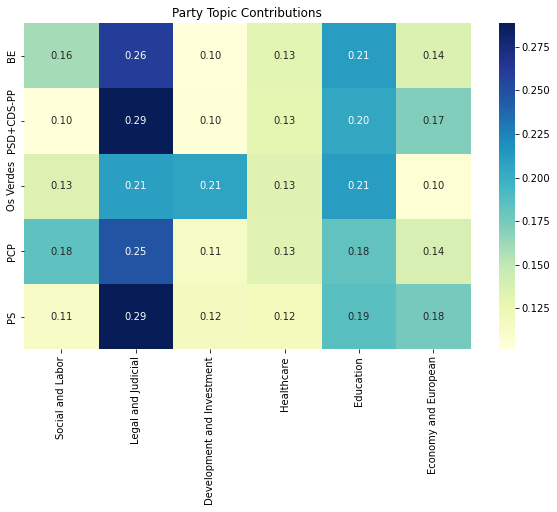

In [107]:
# Step 2: Aggregate Party-Level Contributions
party_topic_contributions = {party: np.zeros(lda_model.num_topics) for party in clean_parties}

for party in clean_parties:
    party_docs = load(party=party)  # Load the party-specific document data
    for doc in party_docs:
        doc_bow = id2word.doc2bow(doc)
        doc_topic = lda_model[doc_bow]
        for topic_id, weight in doc_topic:
            party_topic_contributions[party][topic_id] += weight

# Normalize contributions
for party in clean_parties:
    party_topic_contributions[party] /= sum(party_topic_contributions[party])

# Print top words for each topic
top_words_per_topic = lda_model.print_topics(num_words=5)  # Change the number of words as needed

# Define the relevant topic names
topic_names = {
    0: "Social and Labor",
    1: "Legal and Judicial",
    2: "Development and Investment",
    3: "Healthcare",
    4: "Education",
    5: "Economy and European"
}

# Print top words for each topic with topic names
for topic_id, top_words in top_words_per_topic:
    print(f"{topic_names[topic_id]}: {top_words}")

# Step 3: Visualize
party_topic_df = pd.DataFrame.from_dict(party_topic_contributions, orient='index')
party_topic_df.columns = [topic_names[i] for i in range(lda_model.num_topics)]

# Plot a heatmap
mplt.figure(figsize=(10, 6))
mplt.title("Party Topic Contributions")
sns.heatmap(party_topic_df, cmap="YlGnBu", annot=True, fmt=".2f")

# Save the heatmap as an image
save_path = os.path.join('D:', 'tese_data', 'save', 'panda', 'hm')
image_path = os.path.join(save_path, 'party_topic_heatmap.png')
mplt.savefig(image_path)

mplt.show()


In [52]:
# Normalize contributions
for party in clean_parties:
    party_topic_contributions[party] /= party_topic_contributions[party].sum()


221784


Session:  10
Social and Labor: 0.014*"social" + 0.013*"trabalho" + 0.013*"trabalhadores" + 0.006*"pessoas" + 0.006*"segurança"
Legal and Judicial: 0.006*"república" + 0.005*"comissão" + 0.005*"processo" + 0.003*"justiça" + 0.003*"direito"
Development and Investment: 0.006*"nacional" + 0.004*"setor" + 0.004*"desenvolvimento" + 0.004*"investimento" + 0.003*"público"
Healthcare: 0.027*"saúde" + 0.012*"serviço" + 0.011*"nacional" + 0.007*"milhões" + 0.006*"euros"
Education: 0.007*"política" + 0.006*"educação" + 0.006*"escola" + 0.005*"professores" + 0.005*"escolas"
Economy and European: 0.008*"empresas" + 0.008*"europeia" + 0.007*"economia" + 0.006*"união" + 0.006*"orçamento"


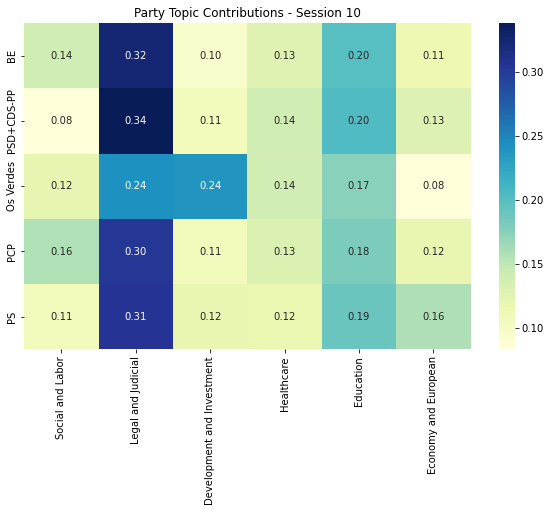


Session:  11
Social and Labor: 0.014*"social" + 0.013*"trabalho" + 0.013*"trabalhadores" + 0.006*"pessoas" + 0.006*"segurança"
Legal and Judicial: 0.006*"república" + 0.005*"comissão" + 0.005*"processo" + 0.003*"justiça" + 0.003*"direito"
Development and Investment: 0.006*"nacional" + 0.004*"setor" + 0.004*"desenvolvimento" + 0.004*"investimento" + 0.003*"público"
Healthcare: 0.027*"saúde" + 0.012*"serviço" + 0.011*"nacional" + 0.007*"milhões" + 0.006*"euros"
Education: 0.007*"política" + 0.006*"educação" + 0.006*"escola" + 0.005*"professores" + 0.005*"escolas"
Economy and European: 0.008*"empresas" + 0.008*"europeia" + 0.007*"economia" + 0.006*"união" + 0.006*"orçamento"


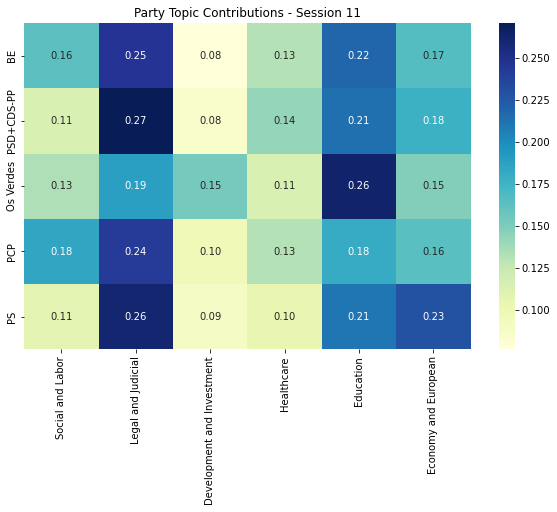


Session:  12
Social and Labor: 0.014*"social" + 0.013*"trabalho" + 0.013*"trabalhadores" + 0.006*"pessoas" + 0.006*"segurança"
Legal and Judicial: 0.006*"república" + 0.005*"comissão" + 0.005*"processo" + 0.003*"justiça" + 0.003*"direito"
Development and Investment: 0.006*"nacional" + 0.004*"setor" + 0.004*"desenvolvimento" + 0.004*"investimento" + 0.003*"público"
Healthcare: 0.027*"saúde" + 0.012*"serviço" + 0.011*"nacional" + 0.007*"milhões" + 0.006*"euros"
Education: 0.007*"política" + 0.006*"educação" + 0.006*"escola" + 0.005*"professores" + 0.005*"escolas"
Economy and European: 0.008*"empresas" + 0.008*"europeia" + 0.007*"economia" + 0.006*"união" + 0.006*"orçamento"


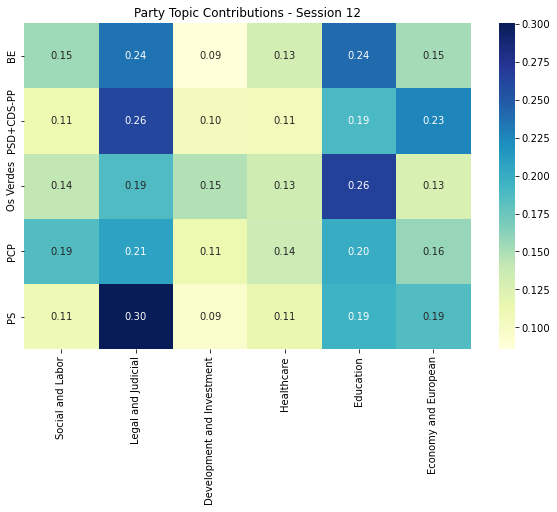


Session:  13
Social and Labor: 0.014*"social" + 0.013*"trabalho" + 0.013*"trabalhadores" + 0.006*"pessoas" + 0.006*"segurança"
Legal and Judicial: 0.006*"república" + 0.005*"comissão" + 0.005*"processo" + 0.003*"justiça" + 0.003*"direito"
Development and Investment: 0.006*"nacional" + 0.004*"setor" + 0.004*"desenvolvimento" + 0.004*"investimento" + 0.003*"público"
Healthcare: 0.027*"saúde" + 0.012*"serviço" + 0.011*"nacional" + 0.007*"milhões" + 0.006*"euros"
Education: 0.007*"política" + 0.006*"educação" + 0.006*"escola" + 0.005*"professores" + 0.005*"escolas"
Economy and European: 0.008*"empresas" + 0.008*"europeia" + 0.007*"economia" + 0.006*"união" + 0.006*"orçamento"


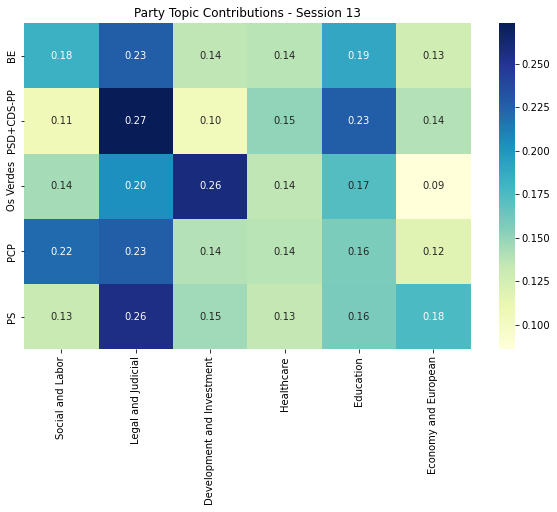

In [108]:
# Create a directory to save the heatmaps
heatmap_dir = os.path.join('D:', 'tese_data', 'save', 'panda', 'hm')
if not os.path.exists(heatmap_dir):
    os.makedirs(heatmap_directory)

# Iterate over legislative sessions
sessions = [10, 11, 12, 13]
for session in sessions:
    
    print("Session: ", session)
    
    # Step 2: Aggregate Party-Level Contributions
    party_topic_contributions = {party: np.zeros(lda_model.num_topics) for party in clean_parties}

    for party in clean_parties:
        party_docs = load(party=party, session=session)  # Load the party-specific document data for the session
        for doc in party_docs:
            doc_bow = id2word.doc2bow(doc)
            doc_topic = lda_model[doc_bow]
            for topic_id, weight in doc_topic:
                party_topic_contributions[party][topic_id] += weight

    # Normalize contributions
    for party in clean_parties:
        party_topic_contributions[party] /= sum(party_topic_contributions[party])
        
    # Print top words for each topic
    top_words_per_topic = lda_model.print_topics(num_words=5)  # Change the number of words as needed

    # Define the relevant topic names
    topic_names = {
        0: "Social and Labor",
        1: "Legal and Judicial",
        2: "Development and Investment",
        3: "Healthcare",
        4: "Education",
        5: "Economy and European"
    }

    # Print top words for each topic with topic names
    for topic_id, top_words in top_words_per_topic:
        print(f"{topic_names[topic_id]}: {top_words}")
    

    # Step 3: Visualize
    party_topic_df = pd.DataFrame.from_dict(party_topic_contributions, orient='index')
    party_topic_df.columns = [topic_names[i] for i in range(lda_model.num_topics)]

    # Plot a heatmap
    mplt.figure(figsize=(10, 6))
    mplt.title(f"Party Topic Contributions - Session {session}")
    sns.heatmap(party_topic_df, cmap="YlGnBu", annot=True, fmt=".2f")

    # Save the heatmap as an image
    image_path = os.path.join(heatmap_dir, f'party_topic_heatmap_session_{session}.png')
    mplt.savefig(image_path)

    mplt.show()
    print()

In [ ]:
# Normalize contributions
for party in clean_parties:
    party_topic_contributions[party] /= party_topic_contributions[party].sum()


In [ ]:
# Below, I try to do LDA for all the parties in different legislatures, so I can compare them afterwards.

In [ ]:
# Firstly, I see wheter 5, 7 or 8 topics is better than 6.

In [59]:
# Load the list of words

# Load the data
data_words = load()


for i in range(4, 9):
    print("LDA for ", i, "topics:")
    
    num_topics = i

    id2word, corpus = create_dict(data_words)
    lda_model = LDA(id2word, corpus, num_topics)



    # Visualize the topics

    vis = run_visualizaton(lda_model, corpus, id2word)
    save_visualizaton(vis)
          
          
    print("End")
    print()
    print()


LDA for  4 topics:
[(0,
  '0.008*"milhões" + 0.007*"orçamento" + 0.006*"euros" + 0.006*"empresas" + '
  '0.005*"investimento" + 0.005*"economia" + 0.005*"pública" + 0.004*"dívida" '
  '+ 0.004*"ensino" + 0.004*"programa"'),
 (1,
  '0.005*"política" + 0.004*"república" + 0.004*"europeia" + 0.003*"união" + '
  '0.003*"maioria" + 0.003*"comissão" + 0.003*"português" + 0.003*"europa" + '
  '0.002*"social" + 0.002*"direitos"'),
 (2,
  '0.009*"saúde" + 0.006*"nacional" + 0.004*"serviço" + 0.003*"serviços" + '
  '0.003*"processo" + 0.003*"república" + 0.003*"público" + 0.002*"acesso" + '
  '0.002*"proteção" + 0.002*"comissão"'),
 (3,
  '0.011*"trabalhadores" + 0.011*"social" + 0.010*"trabalho" + 0.006*"pessoas" '
  '+ 0.005*"segurança" + 0.005*"emprego" + 0.004*"desemprego" + '
  '0.004*"nacional" + 0.004*"situação" + 0.003*"aumento"')]
End


LDA for  5 topics:
[(0,
  '0.006*"comissão" + 0.003*"administração" + 0.003*"problema" + '
  '0.003*"público" + 0.003*"processo" + 0.002*"sistema" + 0.0

C:\Users\drlag\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


End


LDA for  6 topics:
[(0,
  '0.006*"nacional" + 0.005*"europeia" + 0.004*"desenvolvimento" + '
  '0.004*"setor" + 0.004*"união" + 0.004*"investimento" + 0.003*"programa" + '
  '0.003*"política" + 0.003*"público" + 0.003*"políticas"'),
 (1,
  '0.012*"saúde" + 0.010*"social" + 0.007*"orçamento" + 0.005*"nacional" + '
  '0.005*"economia" + 0.005*"empresas" + 0.005*"aumento" + 0.005*"milhões" + '
  '0.005*"emprego" + 0.005*"serviço"'),
 (2,
  '0.006*"república" + 0.005*"processo" + 0.005*"comissão" + 0.004*"justiça" + '
  '0.003*"problema" + 0.003*"alteração" + 0.003*"segurança" + 0.003*"saúde" + '
  '0.003*"especialidade" + 0.003*"direito"'),
 (3,
  '0.010*"trabalhadores" + 0.008*"trabalho" + 0.007*"educação" + '
  '0.006*"escolas" + 0.006*"escola" + 0.006*"pública" + 0.005*"famílias" + '
  '0.005*"professores" + 0.005*"ensino" + 0.005*"milhões"'),
 (4,
  '0.004*"orçamento" + 0.003*"social" + 0.003*"política" + 0.003*"pouco" + '
  '0.003*"vamos" + 0.003*"lá" + 0.003*"seguinte" + 0.003

In [ ]:
# Now, I go through the process of having LDAs for each party-legislature combination.